In [2]:
#import statements 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [3]:
pop_raw = pd.read_csv('./data/Flight Population Tracking 3.0 - Population Data.csv')
dom_raw = pd.read_csv('./data/Flight Population Tracking 3.0 - Dom Data V2.csv')

In [4]:
##Basic cleaning
flight_pop = pop_raw.iloc[:,0:12].dropna()
flight_pop.head()

,Date,Earth,Plague,Wind,Water,Lightning,Ice,Shadow,Light,Arcane,Nature,Fire
0,6/8/2013,30.0,80.0,169.0,57.0,85.0,72.0,126.0,91.0,115.0,95.0,59.0
1,6/19/2013,464.0,1295.0,1470.0,796.0,1333.0,796.0,1485.0,1000.0,1548.0,1220.0,841.0
2,7/9/2013,803.0,2421.0,3302.0,1509.0,2429.0,1663.0,2092.0,1761.0,2903.0,2229.0,1576.0
3,7/14/2013,887.0,2737.0,3740.0,1701.0,2726.0,1934.0,3299.0,1984.0,3273.0,2486.0,1763.0
4,9/13/2013,1080.0,3448.0,4732.0,2205.0,3513.0,2600.0,4223.0,2581.0,4207.0,3205.0,2203.0


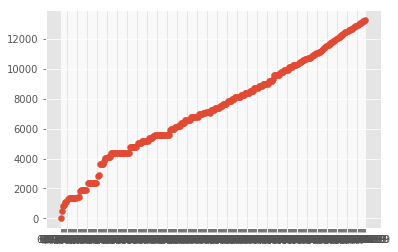

In [15]:
plt.scatter(np.array(flight_pop.loc[:,'Date']),np.array(flight_pop.loc[:,'Earth'])) ##Just checking that this Works

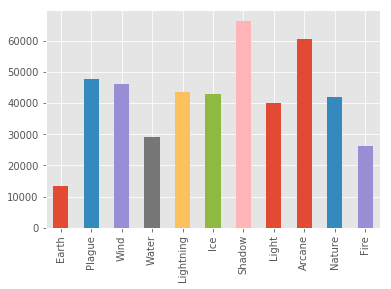

In [5]:
current_pop = flight_pop.iloc[-1,1:12]
current_pop.plot.bar() ##Need to set to flight colors 

In [24]:
##Alright let's make some plots that actually look good
color_lst = ['peru','darkred','lawngreen','slateblue','cyan','lightskyblue',\
            'darkorchid','gold','magenta','darkgreen','darkorange']
flight_lst = flight_pop.iloc[:,1:12].columns.values

['Earth' 'Plague' 'Wind' 'Water' 'Lightning' 'Ice' 'Shadow' 'Light'
 'Arcane' 'Nature' 'Fire']


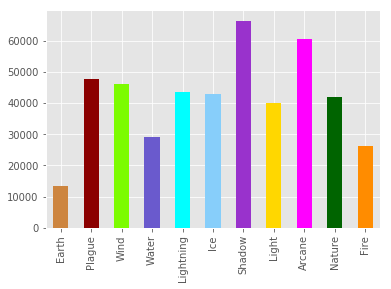

In [16]:
current_pop.plot.bar(stacked=True, color=color_lst)

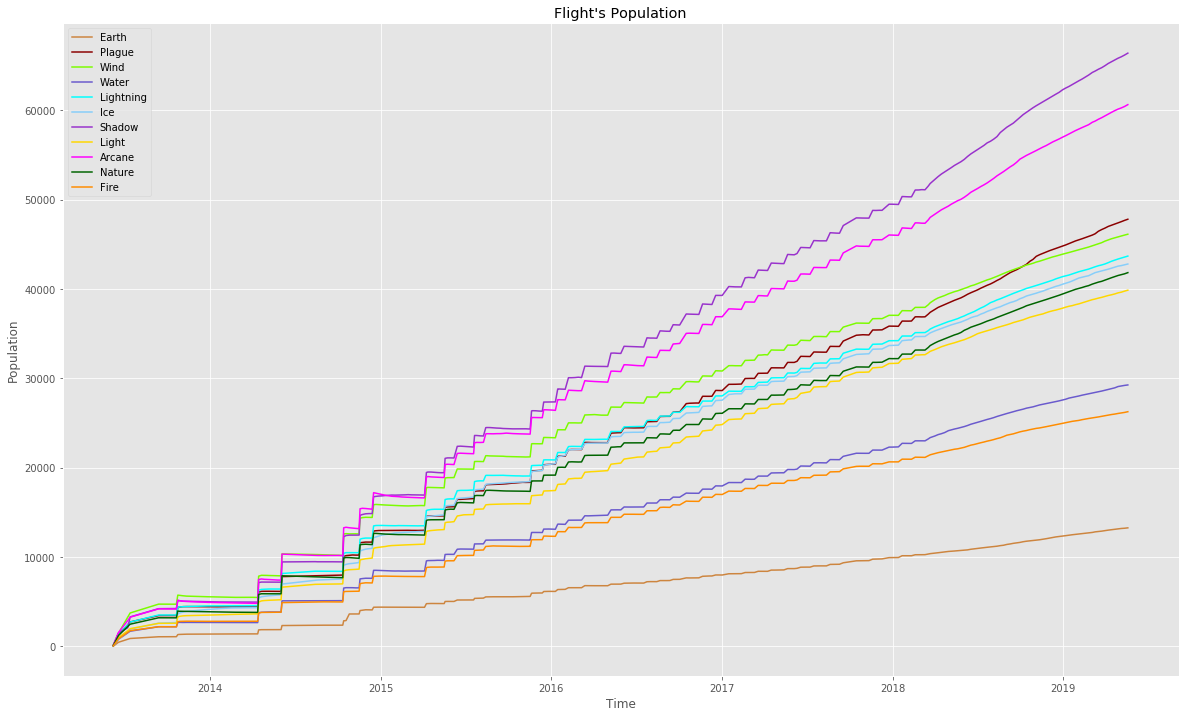

In [53]:
##Gonna transform the date column because it looks bad on a axis 

## We knew this. It's boring
dates = np.array(pd.to_datetime(flight_pop.loc[:,'Date']))
for i in range(len(flight_lst)): 
    plt.plot(dates,np.array(flight_pop.loc[:,flight_lst[i]]),color=color_lst[i],label = flight_lst[i])

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Flight\'s Population')

plt.legend()
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

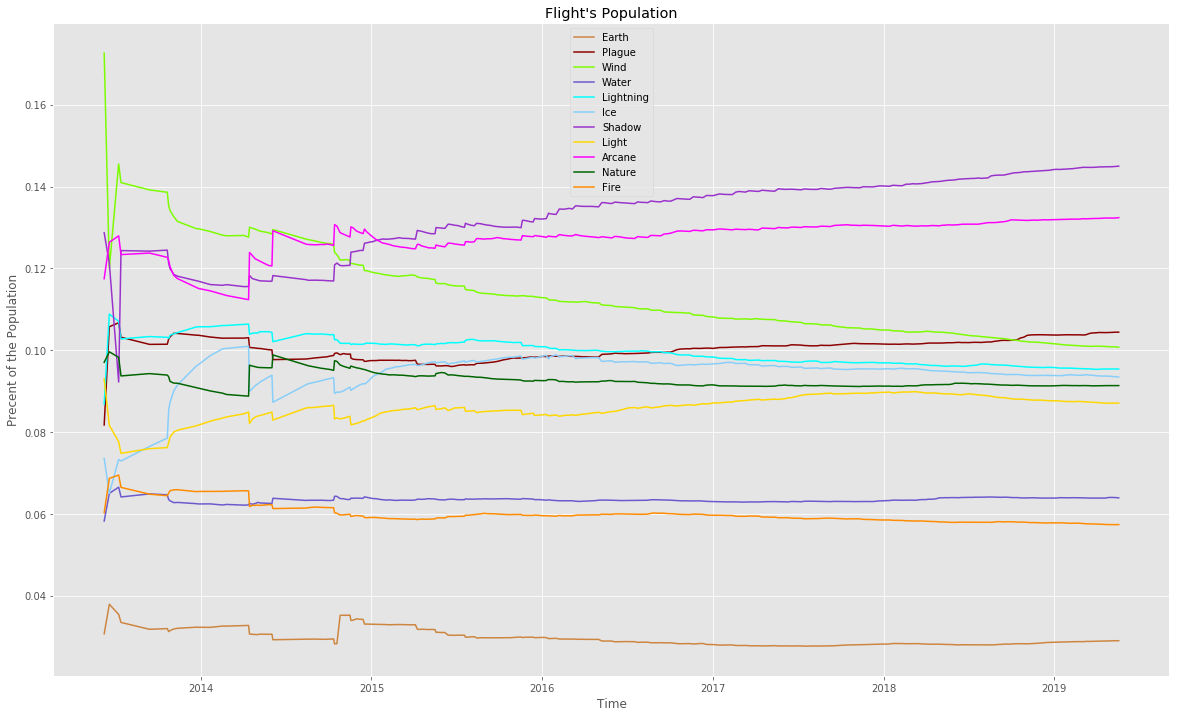

In [144]:
## Try again, normalized by overall population growth 
pop_only = flight_pop.loc[:,flight_lst]
pop_norm = pop_only.div(pop_only.sum(axis=1), axis=0)

for i in range(len(flight_lst)): 
    y = np.array(pop_norm.loc[:,flight_lst[i]])
    plt.plot(dates,y,color=color_lst[i],label = flight_lst[i])

plt.xlabel('Time')
plt.ylabel('Precent of the Population')
plt.title('Flight\'s Population')

plt.legend()
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

Text(0, 0.5, 'Precent of Population')

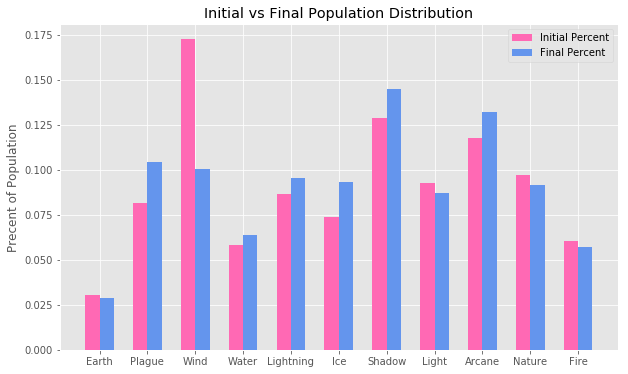

In [125]:
##Bar plots 
init = flight_pop.iloc[0,1:12]/flight_pop.iloc[0,1:12].sum()
fin = flight_pop.iloc[-1,1:12]/flight_pop.iloc[-1,1:12].sum()

x = np.arange(0,21,2)
wid = .6

fig = plt.figure()
plt.rcParams["figure.figsize"] = (10,6)
ax = fig.add_subplot(111)

ax.bar(x-wid, init.values, width=wid, color='hotpink', align='center',label = 'Initial Percent')
ax.bar(x, fin.values, width=wid, color='cornflowerblue', align='center',label = 'Final Percent')
ax.set_xticks(x-wid/2)
ax.set_xticklabels(flight_lst)
ax.legend()
plt.title('Initial vs Final Population Distribution')
ax.set_ylabel("Precent of Population")